# 과제 1번 
##2019.01~06 중  언제 지하철을 가장 많이 이용했을까?

# 필요한 라이브러리 가져오기

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib

In [5]:
# 파일 하나 불러오기
file = r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201901.csv'

pd.read_csv(file)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


# 데이터를 다합치기 

In [6]:
#데이터 합치기
raw = pd.DataFrame()
file0=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201901.csv'
file1=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201902.csv'
file2=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201903.csv'
file3=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201904.csv'
file4=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201905.csv'
file5=r'.\rawfiles\rawfiles\CARD_SUBWAY_MONTH_201906.csv'


temp0=pd.read_csv(file0)
temp1=pd.read_csv(file1)
temp2=pd.read_csv(file2)
temp3=pd.read_csv(file3)
temp4=pd.read_csv(file4)
temp5=pd.read_csv(file5)

raw = pd.concat([temp0,temp1,temp2,temp3,temp4,temp5])

In [7]:
raw=raw.reset_index(drop=True) # 인덱스 초기화

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [9]:
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw['요일'] = raw['사용일자'].dt.dayofweek


In [10]:
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,1


In [11]:
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}
raw['요일'] = raw['요일'].map(conv)

In [12]:
raw.sample(10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
41235,2019-03-11,2호선,신당,10228.0,11050.0,20190314,일
58131,2019-04-09,3호선,옥수,68.0,58.0,20190412,월
27452,2019-02-16,3호선,종로3가,9982.0,16016.0,20190219,금
49758,2019-03-26,3호선,수서,20468.0,20239.0,20190329,월
46184,2019-03-20,분당선,모란,4979.0,3627.0,20190323,화
29526,2019-02-19,공항철도,공항화물청사,2981.0,3537.0,20190222,월
103994,2019-06-25,8호선,석촌,9206.0,10592.0,20190628,월
8252,2019-01-14,공항철도,영종,2340.0,2360.0,20190117,일
59896,2019-04-12,1호선,동인천,20097.0,19228.0,20190415,목
51238,2019-03-28,5호선,영등포시장,11243.0,11864.0,20190331,수


In [13]:
raw["월"] = raw['사용일자'].dt.strftime('%m')       #새로은col생성 월이라는
raw['승하자총승객수'] = raw['승차총승객수'] + raw['하차총승객수']

In [14]:
raw = raw[['사용일자','월','요일','노선명','역명','승차총승객수', '하차총승객수', '승하자총승객수','등록일자']]

In [15]:

raw.head()

,사용일자,월,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,등록일자
0,2019-01-01,01,월,2호선,을지로4가,3862.0,3728.0,7590.0,20190104
1,2019-01-01,01,월,3호선,을지로3가,8104.0,7554.0,15658.0,20190104
2,2019-01-01,01,월,2호선,을지로입구,22478.0,21330.0,43808.0,20190104
3,2019-01-01,01,월,2호선,시청,8381.0,6049.0,14430.0,20190104
4,2019-01-01,01,월,6호선,동묘앞,8045.0,8504.0,16549.0,20190104


In [16]:
raw.groupby('월').get_group('01')['승차총승객수'].sum()

221848014.0

In [24]:
a = raw.groupby('월').sum()['승하자총승객수']   #월마다 합을 구함
a

월
01    442746389.0
02    379836010.0
03    466692826.0
04    470934348.0
05    485718557.0
06    442210635.0
Name: 승하자총승객수, dtype: float64

In [18]:
raw.groupby('월').sum()['승하자총승객수'].max()

485718557.0

In [19]:
pd.DataFrame(a).columns        # groupby함수를 사용하여 월이라는 컬럼에 접급하고 싶었으나 a가 컬럼이 아니였다

Index(['승하자총승객수'], dtype='object')

In [20]:
b = raw.groupby('월').sum()['승하자총승객수']          
index = b.reset_index()['승하자총승객수'].idxmax()     
b.reset_index()['월'][index] + str('월')                 # idxmax(),reset_index()함수를 사용하여  가장많은 달인 5월이 나오게 하였다.

'05월'

# 5월이 가장 많을 걸  알수 있다

# 요일 중에 많은것도 똑같이 하면된다


In [23]:
a = raw.groupby('요일').sum()['승하자총승객수']

In [24]:
raw.groupby('요일').sum()['승하자총승객수'].max()

445310717.0

In [25]:
a.reset_index()

,요일,승하자총승객수
0,금,341950018.0
1,목,445310717.0
2,수,428684383.0
3,월,411979965.0
4,일,391555551.0
5,토,247523995.0
6,화,421134136.0


In [26]:
index = a.reset_index()['승하자총승객수'].idxmax()
a.reset_index()['요일'][index] + str('요일')

'목요일'

In [33]:
a = raw[['요일','승하자총승객수']]
pd.DataFrame(a)

,요일,승하자총승객수
0,월,7590.0
1,월,15658.0
2,월,43808.0
3,월,14430.0
4,월,16549.0
...,...,...
107023,토,12738.0
107024,토,28773.0
107025,토,18497.0
107026,토,22766.0


In [41]:
#elements,val = np.unique(a, return_counts=True)
raw.groupy(['요일'])


AttributeError: 'DataFrame' object has no attribute 'groupy'

<AxesSubplot: >

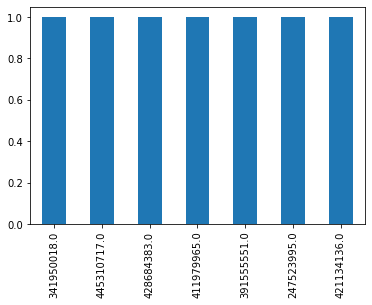

In [187]:
a.value_counts().plot(kind='bar')

In [185]:
!pip list

Package              Version
-------------------- -----------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
cffi                 1.15.1
colorama             0.4.5
debugpy              1.6.0
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.15.3
ipykernel            6.15.0
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           7.7.1
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.6.1
jupyter              1.0.0
jupyter-client       7.3.4
jupyter-console      6.4.4
jupyter-core         4.10.0
jupyterlab-pygments  0.2.2
jupyterlab-widgets   1.1.1
MarkupSafe           2.1.1
matplotlib-inline    0.1.3
mistune              0.8.4
nbclient             0.6.6
nbconvert            6.5.0
nbformat             5.4.0
nest-asyncio 

In [186]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 17.7 MB/s eta 0:00:00
     ------------------------------------- 960.0/960.0 kB 20.2 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     -------------------------------------- 162.0/162.0 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 16.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
